In [1]:
import sys
sys.path.append('/Users/arvindersingh/Desktop/GitLab')

# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

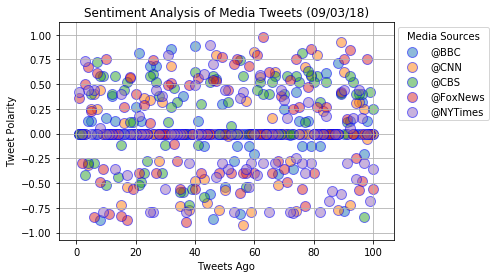

In [2]:
# Target Search Term
target_terms = ("@BBC", "@CNN","@CBS",
                "@FoxNews", "@NYTimes")

# List to hold sentiment
results_df = []

# Loop through all target users
for target in target_terms:
    timestamp_list=[]
    tweet_list=[]
    source_list=[]
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    #tweet count
    num_tweets=0
    
    # Run search around each tweet
    public_tweets=api.search(target,count=100,result_type='recent')
   
    #print(x_axis)
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        timestamp_list.append(tweet['created_at'])
        tweet_list.append(tweet['text'])
        source_list.append(target)
        # Run Vader Analysis on each tweet
        results=analyzer.polarity_scores(tweet['text'])
        # Add each value to the appropriate list
        compound_list.append(results['compound'])
        positive_list.append(results['pos'])
        negative_list.append(results['neg'])
        neutral_list.append(results['neu'])
        num_tweets=num_tweets+1
        
    #set x-axis 
    x_axis = np.arange(num_tweets,0,-1)
    #print(f'{target}: {len(x_axis)} , {len(compound_list)}')
    # Create dataframe of the Sentiments
    sentiment={'Organization':target,
                'TimeStamp':timestamp_list,
                'Tweet_Text':tweet_list, 
                'Positive':positive_list,
                'Negative':negative_list,
                'Neutral':neutral_list,
                'Compound':compound_list,
                'Overall':np.mean(compound_list)}

    sentiment_df=pd.DataFrame(sentiment).set_index('TimeStamp')    
    #sort by timestamp
    sentiment_df=sentiment_df.sort_values(by='TimeStamp',ascending=True)
    
    #Scatter Plot of _compound_ sentiments of the last 100 tweets
    plt.scatter(x_axis,sentiment_df['Compound'],marker='o',label=target,edgecolors='b',s=100,alpha=0.5)

    # Append the dictionary to results_list
    results_df.append(sentiment)

#Plot Properties    
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right',title='Media Sources')
plt.grid()
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title(f'Sentiment Analysis of Media Tweets ({dt.date.today().strftime("%m/%d/%y")})')

#Save Plot
plt.savefig('sentiment_timeline.png')
plt.show()

In [3]:
# Create a DataFrame using results_list and display
results_df=pd.DataFrame(results_df).set_index('Organization')
#Save DataFrame to CSV
results_df.to_csv('news_mood_df.csv')
results_df.head()

,Compound,Negative,Neutral,Overall,Positive,TimeStamp,Tweet_Text
Organization,,,,,,,
@BBC,"[0.0, 0.0, 0.0, 0.1316, 0.1316, 0.0, 0.0, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.43, 0.0,...","[1.0, 1.0, 1.0, 0.856, 0.856, 1.0, 1.0, 0.57, ...",0.026280,"[0.0, 0.0, 0.0, 0.144, 0.144, 0.0, 0.0, 0.0, 0...","[Mon Sep 03 20:26:49 +0000 2018, Mon Sep 03 20...",[RT @MengnjoPaulette: @Victornde2 @BBC @CNN @S...
@CNN,"[0.0, 0.0, 0.0, -0.3182, 0.25, 0.4019, 0.2477,...","[0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.11, 0.0, 0....","[1.0, 1.0, 1.0, 0.887, 0.889, 0.828, 0.729, 0....",0.004903,"[0.0, 0.0, 0.0, 0.0, 0.111, 0.172, 0.161, 0.13...","[Mon Sep 03 20:26:57 +0000 2018, Mon Sep 03 20...",[RT @CNN: French schools say 'Non!' to cellpho...
@CBS,"[0.0, 0.0, -0.4215, -0.296, 0.3989, -0.296, 0....","[0.0, 0.0, 0.24, 0.104, 0.0, 0.121, 0.0, 0.0, ...","[1.0, 1.0, 0.616, 0.896, 0.876, 0.879, 0.748, ...",0.157320,"[0.0, 0.0, 0.144, 0.0, 0.124, 0.0, 0.252, 0.15...","[Mon Sep 03 20:25:36 +0000 2018, Mon Sep 03 20...",[@CNNPolitics @CBSPolitics @ABCPolitics @ABC ...
@FoxNews,"[0.3612, -0.296, 0.5023, 0.6705, 0.2263, -0.84...","[0.0, 0.109, 0.0, 0.0, 0.0, 0.326, 0.0, 0.138,...","[0.762, 0.891, 0.876, 0.784, 0.921, 0.674, 0.7...",0.049865,"[0.238, 0.0, 0.124, 0.216, 0.079, 0.0, 0.266, ...","[Mon Sep 03 20:27:01 +0000 2018, Mon Sep 03 20...",[RT @FoxNews: Do you agree with President @rea...
@NYTimes,"[0.4199, 0.0, 0.7351, 0.4374, 0.0, 0.4374, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.834, 1.0, 0.733, 0.879, 1.0, 0.879, 1.0, 0....",-0.058819,"[0.166, 0.0, 0.267, 0.121, 0.0, 0.121, 0.0, 0....","[Mon Sep 03 20:27:01 +0000 2018, Mon Sep 03 20...",[RT @DMDeDionisio: Thank you Canada! @jaketapp...


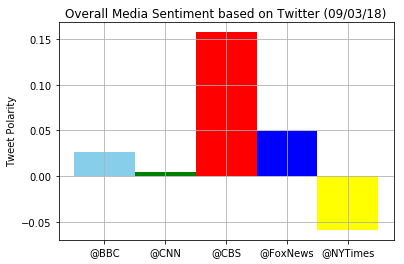

In [4]:
#Overall Sentiments of each Media sources
x=[results_df.index[i] for i in range(len(results_df.index))]
clr=['skyblue','green','red','blue','yellow']
plt.bar(x,height=results_df['Overall'],width=1,color=clr,label=results_df['Overall'])
plt.grid()
plt.ylabel('Tweet Polarity')
plt.title(f'Overall Media Sentiment based on Twitter ({dt.date.today().strftime("%m/%d/%y")})')
#Save Plot
plt.savefig('Overall_Sentiment.png')
plt.show()